In [24]:
# Loading required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import probplot
from statsmodels.iolib.summary2 import summary_col
from tabulate import tabulate

In [25]:
# Load data
excel_file_path = "data/data.xlsx"
data = pd.read_excel(excel_file_path)
data

,Time,House_price,Gold_price,Fixed_deposit_rate,Shanghai_stock_index,core_CPI,headline_CPI,core_inflation,headline_inflation,government_bond_yield_sixm,government_bond_yield_fivey,government_bond_yield_teny
0,2010-03-31,6399,243.91,4.15,3109.1050,84.476667,77.396667,0.002730,0.019406,0.014136,0.027923,0.034818
1,2010-06-30,6657,271.60,4.15,2398.3700,84.753333,77.286667,0.003275,-0.001421,0.021017,0.023997,0.032790
2,2010-09-30,7049,282.35,4.15,2655.6580,84.993333,77.723333,0.002832,0.005650,0.018884,0.023473,0.033183
3,2010-12-31,7492,301.11,4.15,2808.0770,85.586667,79.446667,0.006981,0.022173,0.023580,0.025526,0.027141
4,2011-03-31,7845,302.07,4.50,2928.1110,86.203333,81.393333,0.007205,0.024503,0.027008,0.032328,0.039120
5,2011-06-30,7779,314.32,4.75,2762.0760,86.680000,81.826667,0.005530,0.005324,0.034127,0.034700,0.038957
6,2011-09-30,7542,338.08,5.00,2359.2200,86.956667,82.730000,0.003192,0.011040,0.034729,0.037119,0.038605
7,2011-12-31,7026,319.49,5.00,2199.4170,87.153333,83.140000,0.002262,0.004956,0.026641,0.030376,0.034303
8,2012-03-31,7562,339.13,5.00,2262.7880,87.383333,84.503333,0.002639,0.016398,0.027685,0.029225,0.035004
9,2012-06-30,7814,322.25,4.65,2225.4310,87.770000,84.163333,0.004425,-0.004024,0.022184,0.029143,0.033253


# **Original Data Analysis**

In [26]:
# Convert quarters to a Date format
data['Time']=pd.to_datetime(data['Time'])
data['Year']=data['Time'].dt.year
data['Quarter']=data['Time'].dt.quarter
data['Quarter'] = 'Q' + data['Quarter'].astype(str)

# Convert percentage columns
percentage_columns = ['core_inflation', 'headline_inflation', 'government_bond_yield_sixm',
                       'government_bond_yield_fivey', 'government_bond_yield_teny']
data[percentage_columns] *= 100


# Display summary statistics
c1 = ["House_price", "Gold_price", "Fixed_deposit_rate", "Shanghai_stock_index", 
        "government_bond_yield_sixm", "government_bond_yield_fivey", "government_bond_yield_teny"]
summary_data = data.describe().loc[['mean', 'std', 'min', 'max'], c1].transpose()
print(summary_data)

                                     mean          std        min         max
House_price                  15028.977273  5971.001562  6399.0000  23006.0000
Gold_price                     291.587500    47.018941   222.9900    402.6400
Fixed_deposit_rate               3.653409     0.718962     3.0000      5.0000
Shanghai_stock_index          2812.791005   517.081971  1979.2060   4277.2219
government_bond_yield_sixm       2.678539     0.629197     1.4136      4.1741
government_bond_yield_fivey      3.139277     0.498754     2.3372      4.4583
government_bond_yield_teny       3.421255     0.457127     2.5899      4.5518


# **Regression Analysis**

In [46]:
# Calculate percentage changes
data['House_Change'] = (data['House_price'] - data['House_price'].shift(1)) / data['House_price'].shift(1) * 100
data['Gold_Change'] = (data['Gold_price'] - data['Gold_price'].shift(1)) / data['Gold_price'].shift(1) * 100
data['Shanghai_stock_Change'] = (data['Shanghai_stock_index'] - data['Shanghai_stock_index'].shift(1)) / data['Shanghai_stock_index'].shift(1) * 100

# Replace NA with the second row as the default value
data['House_Change'].fillna(data['House_Change'].iloc[1], inplace=True)
data['Gold_Change'].fillna(data['Gold_Change'].iloc[1], inplace=True)
data['Shanghai_stock_Change'].fillna(data['Shanghai_stock_Change'].iloc[1], inplace=True)

# Calculate the return rate - Asset/Inflation
data['House_proportion'] = data['House_Change'] / data['core_inflation']
data['Gold_proportion'] = data['Gold_Change'] / data['core_inflation']
data['Fixed_deposit_proportion'] = data['Fixed_deposit_rate'] / data['core_inflation']
data['Shanghai_stock_proportion'] = data['Shanghai_stock_Change'] / data['core_inflation']
data['Gover_sixm_proportion'] = data['government_bond_yield_sixm'] / data['core_inflation']
data['Gover_fivey_proportion'] = data['government_bond_yield_fivey'] / data['core_inflation']
data['Gover_teny_proportion'] = data['government_bond_yield_teny'] / data['core_inflation']

## **Original formular**

In [47]:
data['log_core_inflation'] = np.log1p(data['core_inflation'])
# Run regression house_property_price on log(core_inflation) and the other assets
lm_house_on_others = sm.OLS(data['House_Change'], sm.add_constant(data[['log_core_inflation', 'Gold_Change', 'Fixed_deposit_rate',
                                                                        'Shanghai_stock_Change', 'government_bond_yield_sixm',
                                                                        'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

lm_gold_on_others = sm.OLS(data['Gold_Change'], sm.add_constant(data[['log_core_inflation', 'House_Change', 'Fixed_deposit_rate',
                                                                      'Shanghai_stock_Change', 'government_bond_yield_sixm',
                                                                      'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

lm_fixed_on_others = sm.OLS(data['Fixed_deposit_rate'], sm.add_constant(data[['log_core_inflation', 'House_Change', 'Gold_Change',
                                                                             'Shanghai_stock_Change', 'government_bond_yield_sixm',
                                                                             'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

lm_stock_on_others = sm.OLS(data['Shanghai_stock_Change'], sm.add_constant(data[['log_core_inflation', 'House_Change', 'Gold_Change',
                                                                                 'Fixed_deposit_rate', 'government_bond_yield_sixm',
                                                                                 'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

lm_sixm_on_others = sm.OLS(data['government_bond_yield_sixm'], sm.add_constant(data[['log_core_inflation', 'House_Change', 'Gold_Change',
                                                                                    'Fixed_deposit_rate', 'Shanghai_stock_Change',
                                                                                    'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

lm_fivey_on_others = sm.OLS(data['government_bond_yield_fivey'], sm.add_constant(data[['log_core_inflation', 'House_Change', 'Gold_Change',
                                                                                      'Fixed_deposit_rate', 'Shanghai_stock_Change',
                                                                                      'government_bond_yield_sixm', 'government_bond_yield_teny']])).fit()

lm_teny_on_others = sm.OLS(data['government_bond_yield_teny'], sm.add_constant(data[['log_core_inflation', 'House_Change', 'Gold_Change',
                                                                                    'Fixed_deposit_rate', 'Shanghai_stock_Change',
                                                                                    'government_bond_yield_sixm', 'government_bond_yield_fivey']])).fit()
# Store the models in lists
models_all = [lm_house_on_others, lm_gold_on_others, lm_fixed_on_others, lm_stock_on_others, lm_sixm_on_others, lm_fivey_on_others, lm_teny_on_others]
model_names_all = ["house", "gold", "fixed", "stock", "sixm", "fivey", "teny"]

### Print the summaries

In [48]:
summary_col(models_all, stars=True, model_names=model_names_all)

,house,gold,fixed,stock,sixm,fivey,teny
Fixed_deposit_rate,1.3022,0.7434,,-0.2121,0.1449,-0.1288***,0.1757***
,(1.8012),(1.9689),,(3.6776),(0.0934),(0.0413),(0.0386)
Gold_Change,-0.1231,,0.0053,-0.3486,-0.0179**,0.0024,-0.0013
,(0.1519),,(0.0141),(0.3052),(0.0076),(0.0039),(0.0041)
House_Change,,-0.1456,0.0110,0.0148,-0.0055,-0.0009,-0.0013
,,(0.1796),(0.0152),(0.3379),(0.0088),(0.0043),(0.0044)
R-squared,0.1313,0.2665,0.4457,0.0706,0.7575,0.9102,0.8841
R-squared Adj.,-0.0376,0.1239,0.3379,-0.1101,0.7104,0.8928,0.8615
Shanghai_stock_Change,0.0036,-0.1003,-0.0004,,-0.0004,0.0013,-0.0015
,(0.0822),(0.0878),(0.0076),,(0.0044),(0.0021),(0.0022)


## **Correlation Matrix**

In [49]:
# Check correlation between different assets
col_corr = ["House_Change", "Gold_Change", "Fixed_deposit_rate", "Shanghai_stock_Change",
            "government_bond_yield_sixm", "government_bond_yield_fivey", "government_bond_yield_teny"]
data_corr = data[col_corr]
correlation_matrix = data_corr.corr()
correlation_matrix

,House_Change,Gold_Change,Fixed_deposit_rate,Shanghai_stock_Change,government_bond_yield_sixm,government_bond_yield_fivey,government_bond_yield_teny
House_Change,1.000000,-0.019876,0.018186,0.005208,-0.223966,-0.260128,-0.215020
Gold_Change,-0.019876,1.000000,-0.098572,-0.219298,-0.459805,-0.321441,-0.265381
Fixed_deposit_rate,0.018186,-0.098572,1.000000,-0.065497,0.311045,0.306596,0.518734
Shanghai_stock_Change,0.005208,-0.219298,-0.065497,1.000000,0.112805,0.081848,0.004602
government_bond_yield_sixm,-0.223966,-0.459805,0.311045,0.112805,1.000000,0.830680,0.711165
government_bond_yield_fivey,-0.260128,-0.321441,0.306596,0.081848,0.830680,1.000000,0.898867
government_bond_yield_teny,-0.215020,-0.265381,0.518734,0.004602,0.711165,0.898867,1.000000


<Axes: >

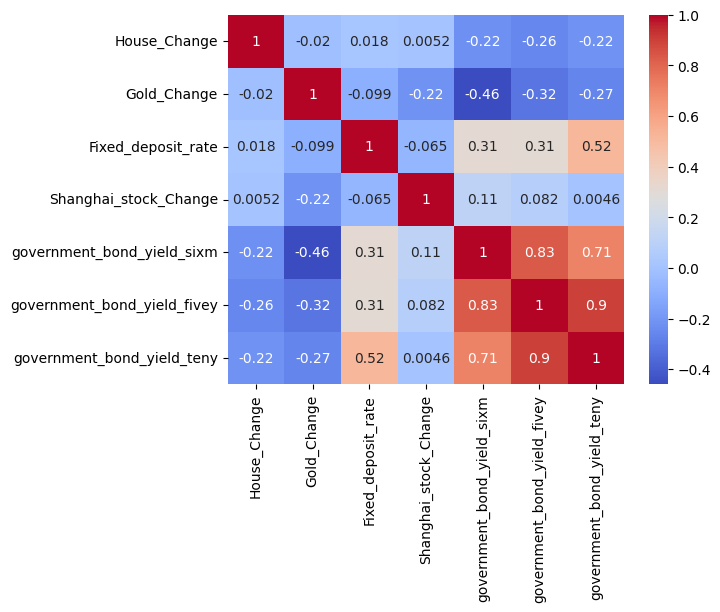

In [50]:
# In heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

## **New Regression Formular Without Assets with Weak Correlation**

according correlation and p valuse adjust the model if 0.00 to 0.19: Very weak correlation

In [51]:
import statsmodels.api as sm

# Model for House_Change
lm_house_on_others_new = sm.OLS(data['House_Change'], sm.add_constant(data[['log_core_inflation', 'government_bond_yield_sixm', 
                                                                             'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

# Model for Gold_Change
lm_gold_on_others_new = sm.OLS(data['Gold_Change'], sm.add_constant(data[['log_core_inflation', 'Shanghai_stock_Change', 
                                                                           'government_bond_yield_sixm', 'government_bond_yield_fivey', 
                                                                           'government_bond_yield_teny']])).fit()

# Model for Fixed_deposit_rate
lm_fixed_on_others_new = sm.OLS(data['Fixed_deposit_rate'], sm.add_constant(data[['log_core_inflation', 'House_Change', 
                                                                                 'government_bond_yield_sixm', 'government_bond_yield_fivey', 
                                                                                 'government_bond_yield_teny']])).fit()

# Model for Shanghai_stock_Change
lm_stock_on_others_new = sm.OLS(data['Shanghai_stock_Change'], sm.add_constant(data[['log_core_inflation', 'Gold_Change']])).fit()

# Model for government_bond_yield_sixm
lm_sixm_on_others_new = sm.OLS(data['government_bond_yield_sixm'], sm.add_constant(data[['log_core_inflation', 'House_Change', 
                                                                                        'Gold_Change', 'Fixed_deposit_rate', 
                                                                                        'government_bond_yield_fivey', 'government_bond_yield_teny']])).fit()

# Model for government_bond_yield_fivey
lm_fivey_on_others_new = sm.OLS(data['government_bond_yield_fivey'], sm.add_constant(data[['log_core_inflation', 'House_Change', 
                                                                                          'Gold_Change', 'Fixed_deposit_rate', 
                                                                                          'government_bond_yield_sixm', 'government_bond_yield_teny']])).fit()

# Model for government_bond_yield_teny
lm_teny_on_others_new = sm.OLS(data['government_bond_yield_teny'], sm.add_constant(data[['log_core_inflation', 'House_Change', 
                                                                                        'Gold_Change', 'Fixed_deposit_rate', 
                                                                                        'government_bond_yield_sixm', 'government_bond_yield_fivey']])).fit()

# Store the models in lists
models_all = [lm_house_on_others_new, lm_gold_on_others_new, lm_fixed_on_others_new, lm_stock_on_others_new, lm_sixm_on_others_new, lm_fivey_on_others_new, lm_teny_on_others_new]
model_names_all = ["house", "gold", "fixed", "stock", "sixm", "fivey", "teny"]

### Displaying the summaries

In [53]:
summary_col(models_all, stars=True, model_names=model_names_all)

,house,gold,fixed,stock,sixm,fivey,teny
Fixed_deposit_rate,,,,,0.1450,-0.1304***,0.1784***
,,,,,(0.0921),(0.0409),(0.0381)
Gold_Change,,,,-0.3603,-0.0178**,0.0019,-0.0008
,,,,(0.2533),(0.0073),(0.0038),(0.0040)
House_Change,,,0.0102,,-0.0055,-0.0009,-0.0013
,,,(0.0147),,(0.0087),(0.0042),(0.0044)
R-squared,0.1032,0.2514,0.4432,0.0485,0.7575,0.9093,0.8825
R-squared Adj.,0.0113,0.1529,0.3699,0.0021,0.7182,0.8945,0.8635
Shanghai_stock_Change,,-0.1031,,,,,
,,(0.0863),,,,,


# **Assumption Check**

In [57]:
def check_assumptions(model):
    # Check Linearity
    # Plotting the observed vs predicted values
    plt.scatter(model.fittedvalues, model.model.endog)
    plt.xlabel('Predicted values')
    plt.ylabel('Observed values')
    plt.title('Check for Linearity')
    plt.show()

    # Check Independence of Residuals
    # Plotting the residuals vs predicted values
    plt.scatter(model.fittedvalues, model.resid)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Check for Independence of Residuals')
    plt.show()

    # Check Homoscedasticity
    # Plotting the predicted values vs residuals
    plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
    plt.xlabel('Predicted values')
    plt.ylabel('Sqrt of the Absolute Residuals')
    plt.title('Check for Homoscedasticity')
    plt.show()

    # Check Normality of Residuals
    # Histogram of the residuals
    plt.hist(model.resid, bins=30)
    plt.title('Histogram of Residuals')
    plt.show()
    
    # QQ plot
    sm.qqplot(model.resid, line='s')
    plt.title('QQ Plot')
    plt.show()

    # Check Multicollinearity
    # Calculating VIF for each variable
    X = model.model.exog
    vif_data = pd.DataFrame()
    vif_data["feature"] = model.model.exog_names
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    print(vif_data)

Assumption checks for house model


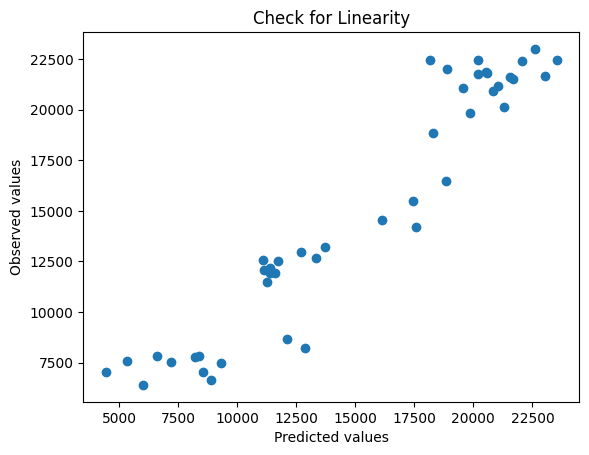

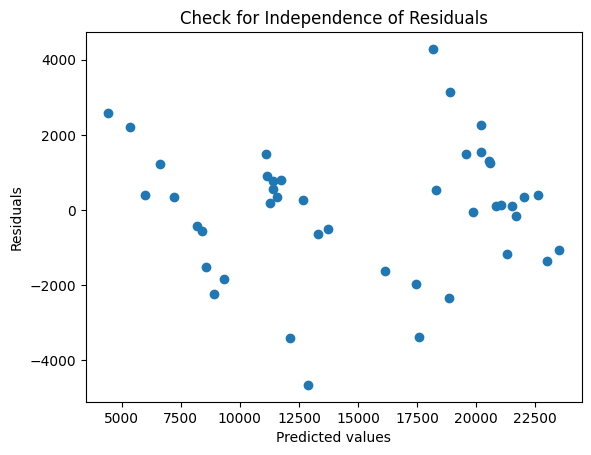

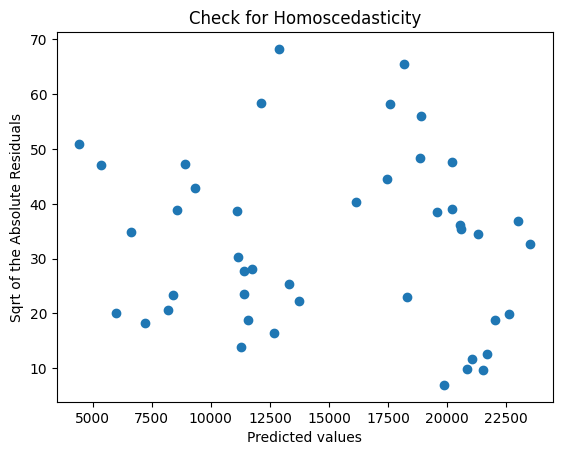

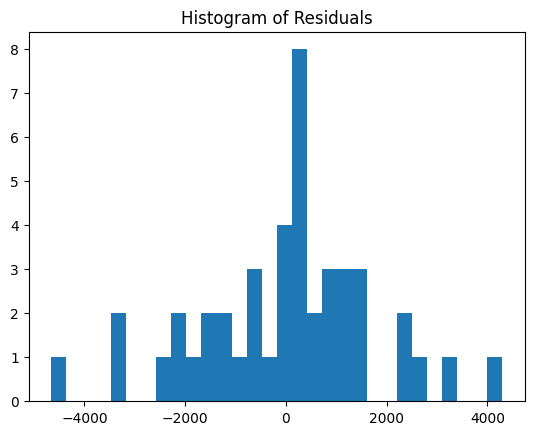

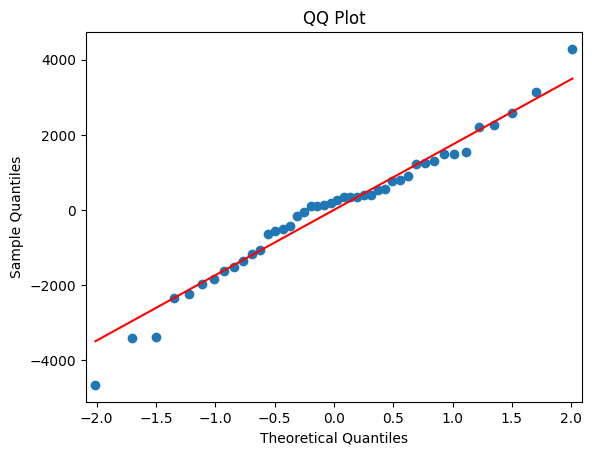

                      feature         VIF
0                   Intercept  370.694384
1    np.log1p(core_inflation)    1.257879
2                  Gold_price    1.460111
3          Fixed_deposit_rate    2.164727
4        Shanghai_stock_index    1.877528
5  government_bond_yield_sixm    2.132539
6  government_bond_yield_teny    2.792623

--------------------------------------------------

Assumption checks for gold model


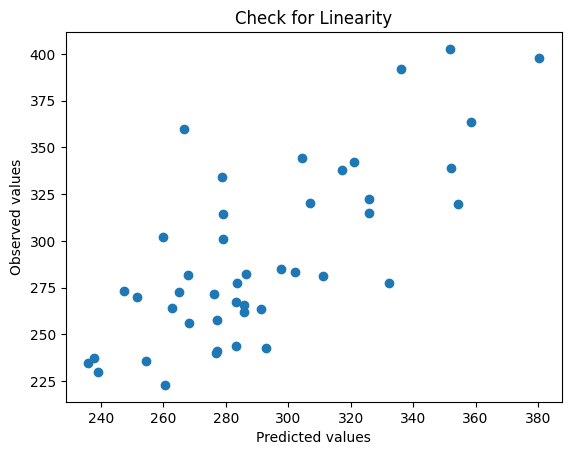

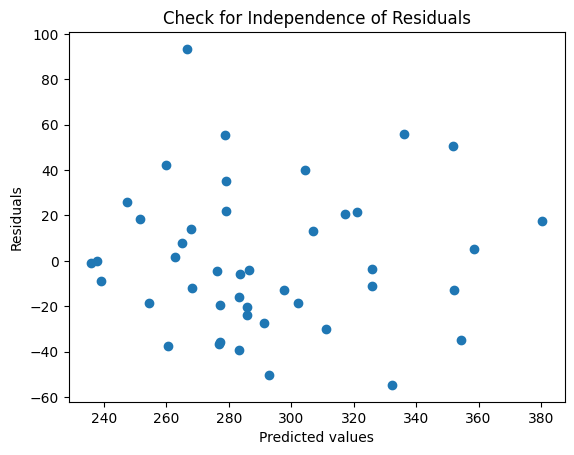

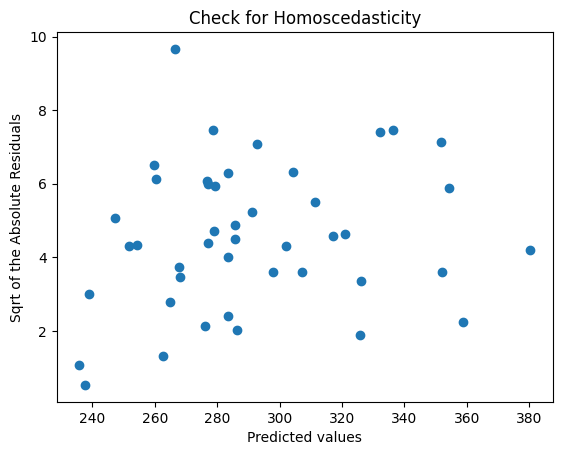

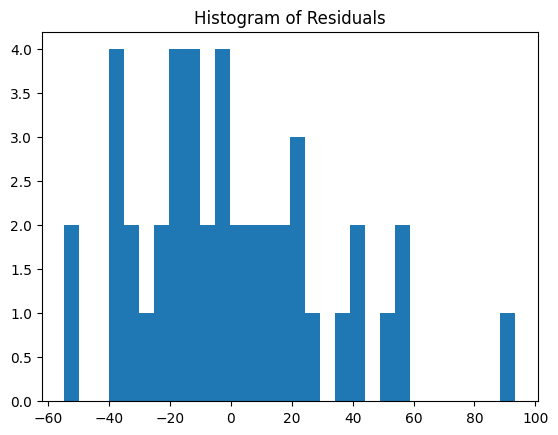

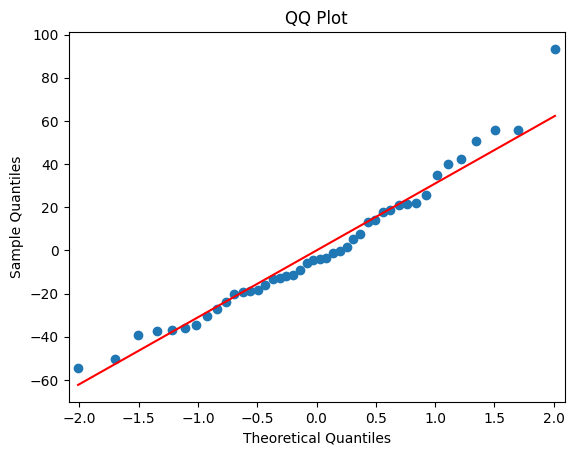

                       feature         VIF
0                    Intercept  393.793319
1     np.log1p(core_inflation)    1.117094
2                  House_price    7.294132
3           Fixed_deposit_rate    7.710695
4   government_bond_yield_sixm    3.722707
5  government_bond_yield_fivey   11.504337
6   government_bond_yield_teny    8.866874

--------------------------------------------------

Assumption checks for fixed model


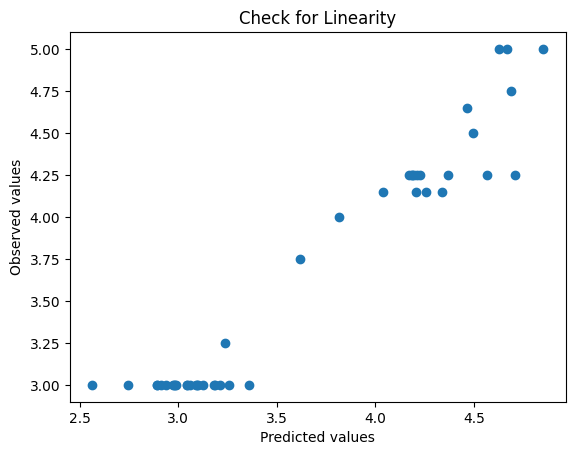

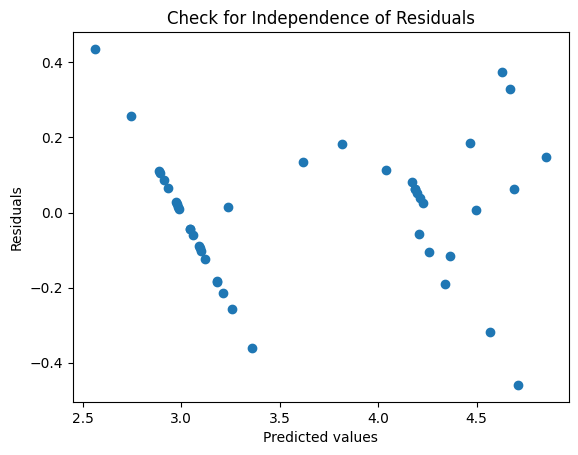

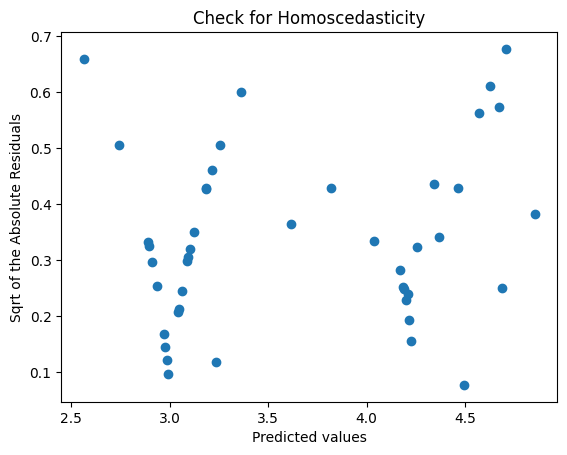

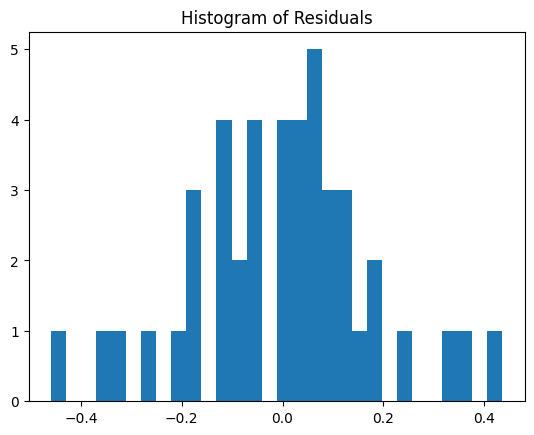

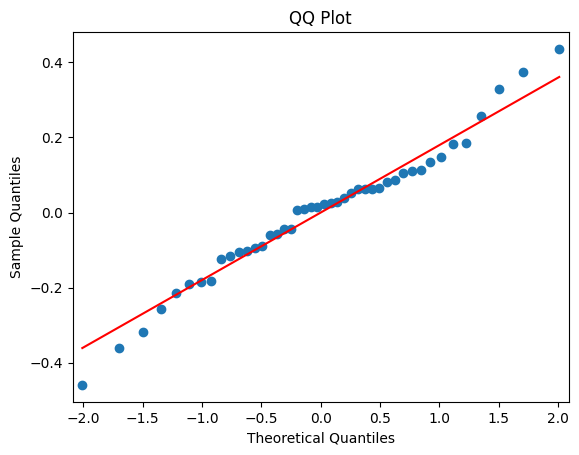

                       feature         VIF
0                    Intercept  340.517638
1     np.log1p(core_inflation)    1.253974
2                  House_price    2.031862
3                   Gold_price    1.480439
4         Shanghai_stock_index    1.642569
5   government_bond_yield_sixm    3.503838
6  government_bond_yield_fivey   11.502628
7   government_bond_yield_teny    8.859687

--------------------------------------------------

Assumption checks for stock model


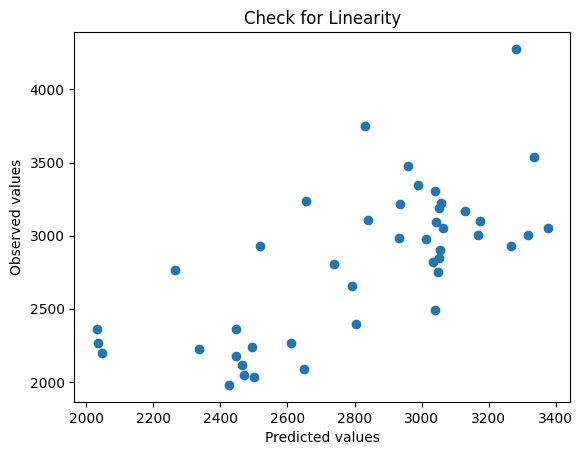

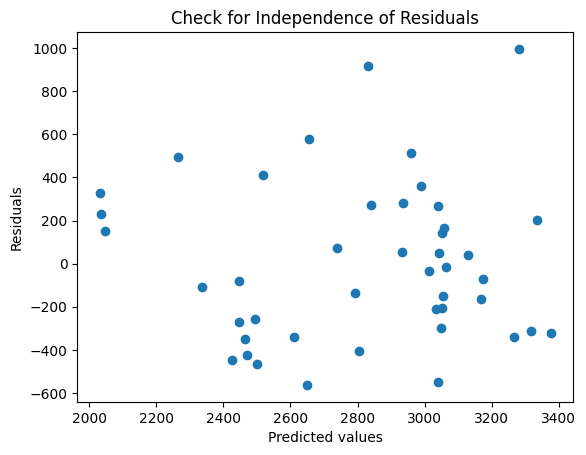

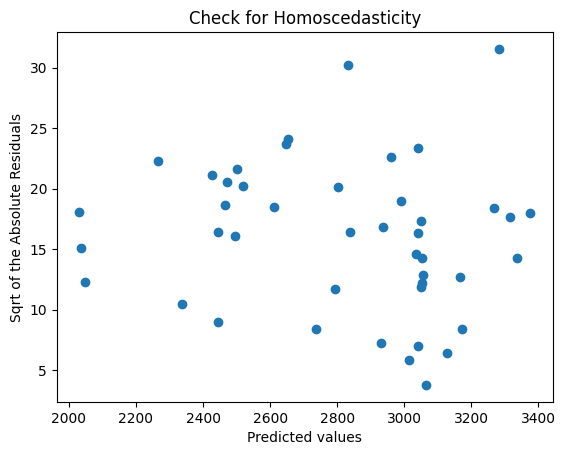

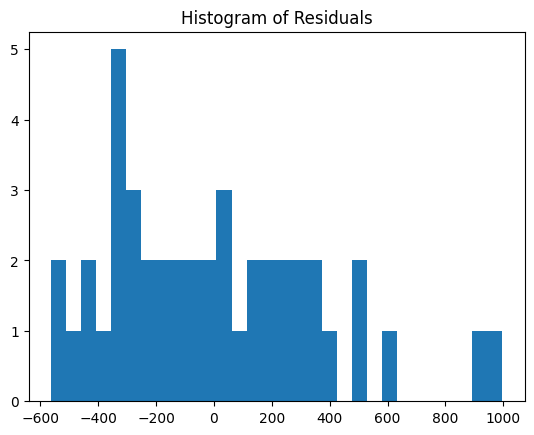

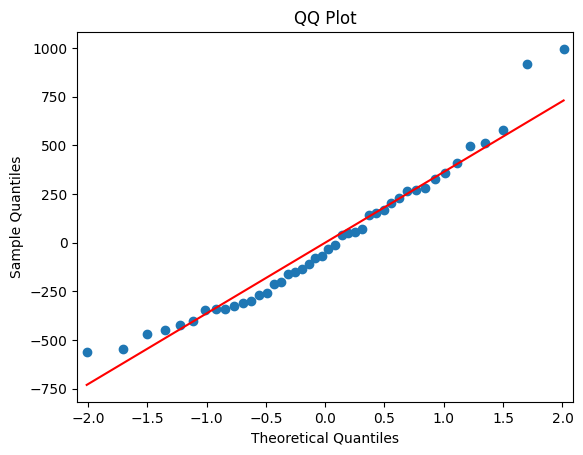

                       feature         VIF
0                    Intercept  393.793319
1     np.log1p(core_inflation)    1.117094
2                  House_price    7.294132
3           Fixed_deposit_rate    7.710695
4   government_bond_yield_sixm    3.722707
5  government_bond_yield_fivey   11.504337
6   government_bond_yield_teny    8.866874

--------------------------------------------------

Assumption checks for sixm model


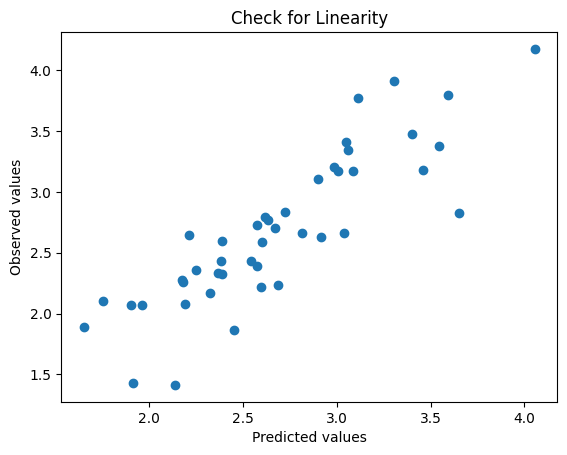

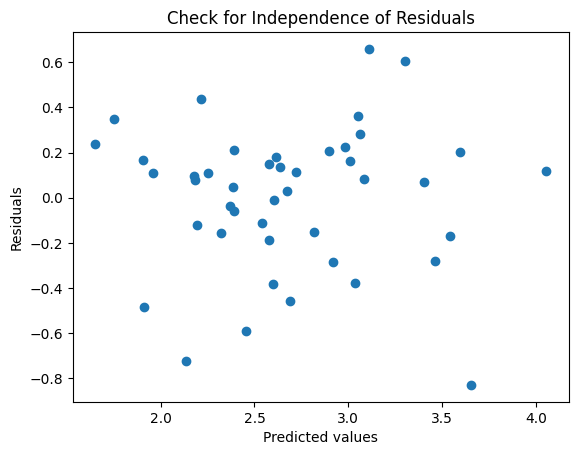

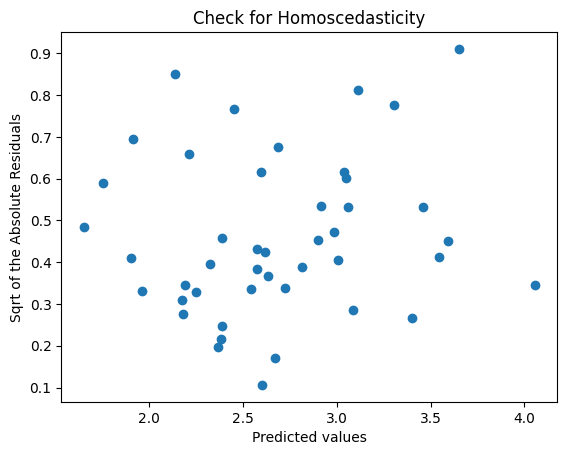

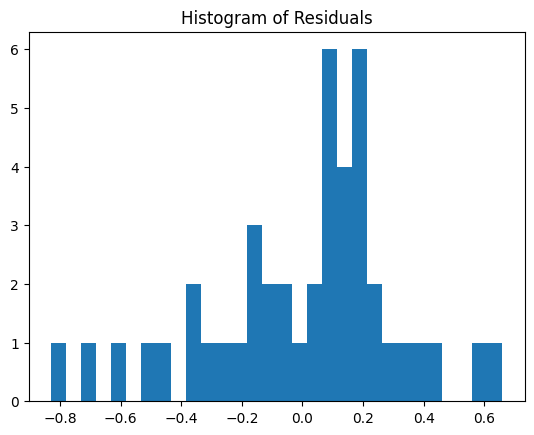

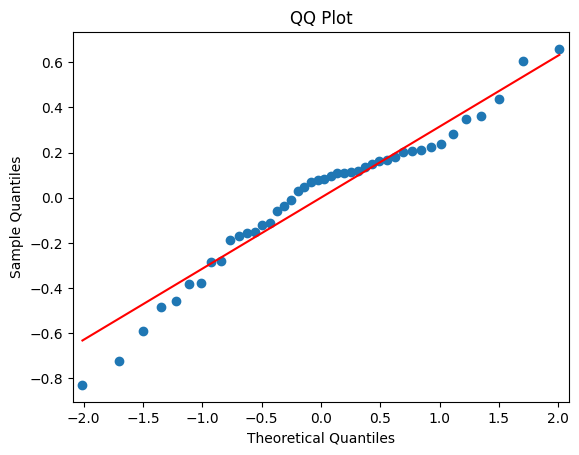

                       feature         VIF
0                    Intercept  671.123217
1     np.log1p(core_inflation)    1.248876
2                  House_price   10.908304
3                   Gold_price    2.140821
4           Fixed_deposit_rate   14.043746
5         Shanghai_stock_index    1.973311
6  government_bond_yield_fivey    8.022270
7   government_bond_yield_teny    8.710745

--------------------------------------------------

Assumption checks for fivey model


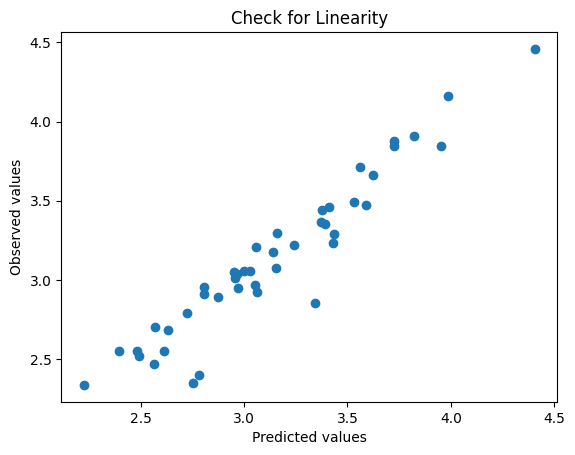

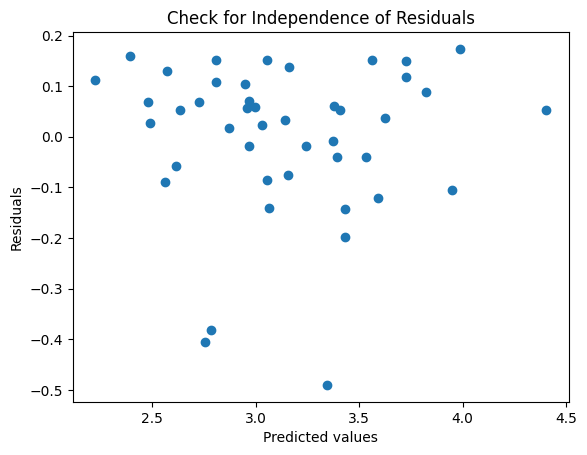

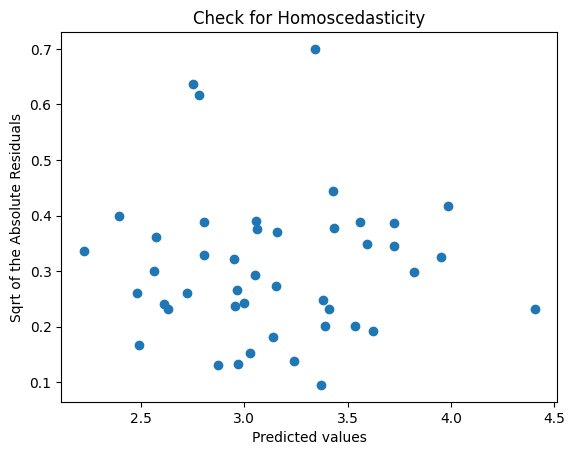

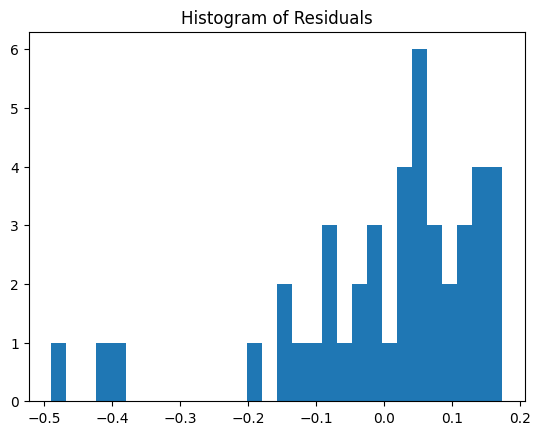

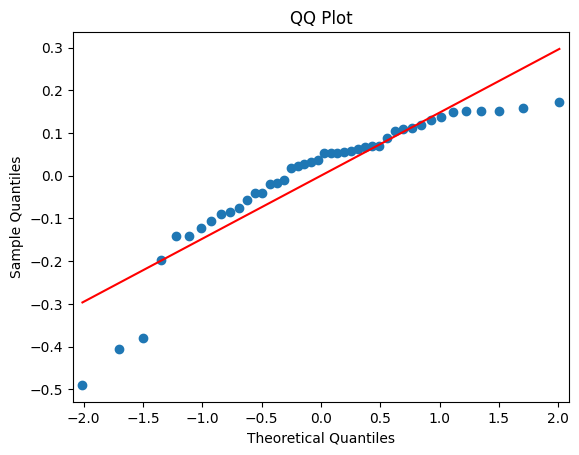

                      feature         VIF
0                   Intercept  370.694384
1    np.log1p(core_inflation)    1.257879
2                  Gold_price    1.460111
3          Fixed_deposit_rate    2.164727
4        Shanghai_stock_index    1.877528
5  government_bond_yield_sixm    2.132539
6  government_bond_yield_teny    2.792623

--------------------------------------------------

Assumption checks for teny model


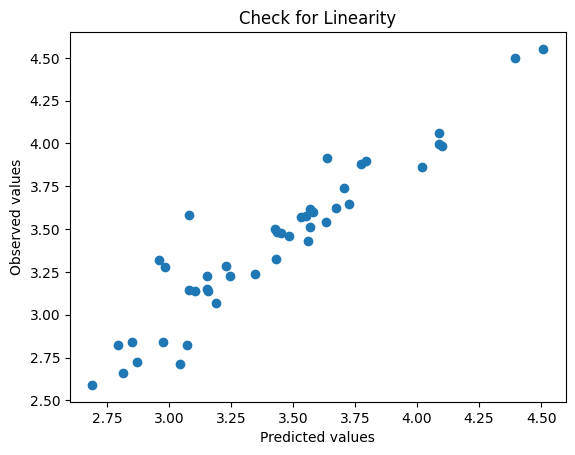

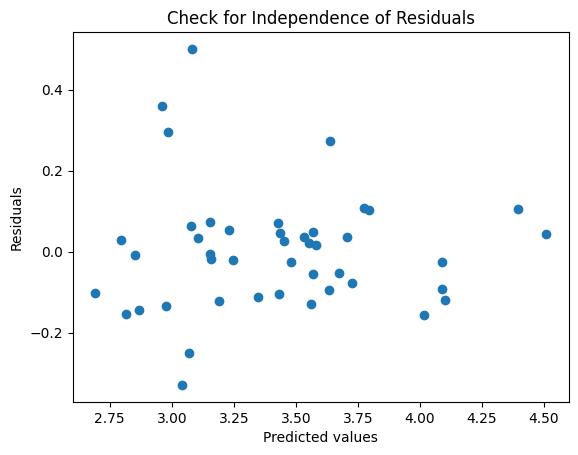

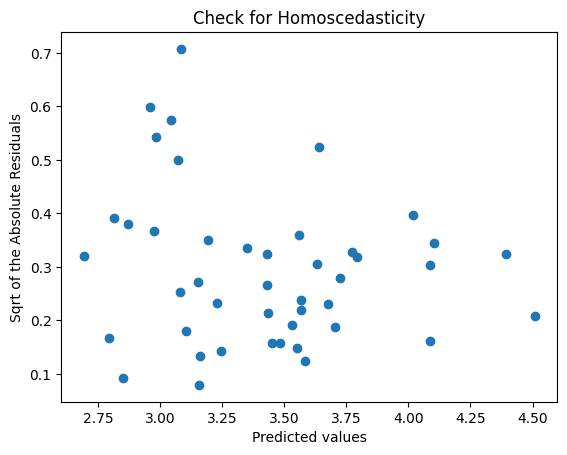

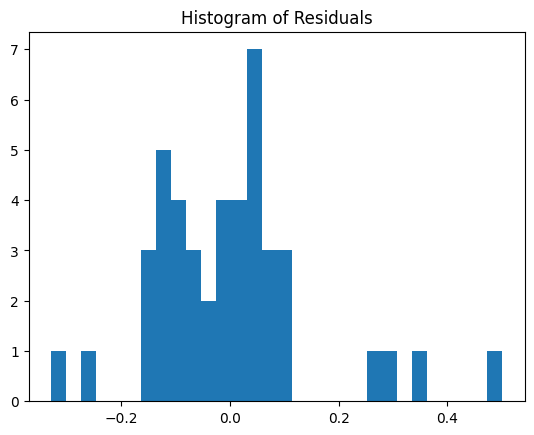

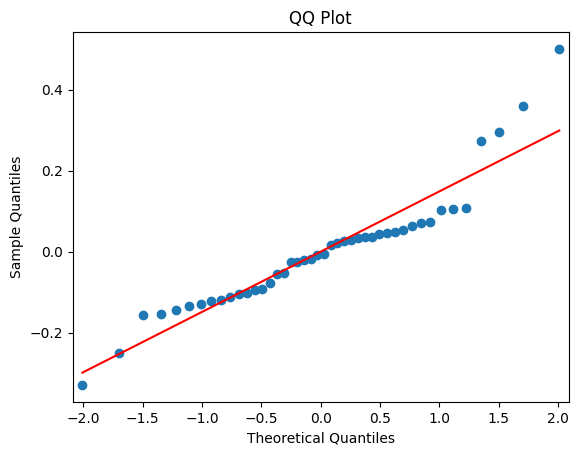

                       feature         VIF
0                    Intercept  669.980313
1     np.log1p(core_inflation)    1.254663
2                  House_price   11.863571
3                   Gold_price    2.159729
4           Fixed_deposit_rate   15.029335
5         Shanghai_stock_index    1.971737
6   government_bond_yield_sixm    3.686699
7  government_bond_yield_fivey    3.622268

--------------------------------------------------



In [58]:
# Defining the models
model_formulas = {
    "house": "House_price ~ np.log1p(core_inflation) + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_teny",
    "gold": "Gold_price ~ np.log1p(core_inflation) + House_price + Fixed_deposit_rate + government_bond_yield_sixm + government_bond_yield_fivey + government_bond_yield_teny",
    "fixed": "Fixed_deposit_rate ~ np.log1p(core_inflation) + House_price + Gold_price + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_fivey + government_bond_yield_teny",
    "stock": "Shanghai_stock_index ~ np.log1p(core_inflation) + House_price + Fixed_deposit_rate + government_bond_yield_sixm + government_bond_yield_fivey + government_bond_yield_teny",
    "sixm": "government_bond_yield_sixm ~ np.log1p(core_inflation) + House_price + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_fivey + government_bond_yield_teny",
    "fivey": "government_bond_yield_fivey ~ np.log1p(core_inflation) + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_teny",
    "teny": "government_bond_yield_teny ~ np.log1p(core_inflation) + House_price + Gold_price + Fixed_deposit_rate + Shanghai_stock_index + government_bond_yield_sixm + government_bond_yield_fivey"
}

# Creating and fitting the models
models = {name: sm.OLS.from_formula(formula, data).fit() for name, formula in model_formulas.items()}
# Looping through each model in 'models_all_new' and 'models_2_new'
for model_name, model in models.items():
    print(f"Assumption checks for {model_name} model")
    check_assumptions(model)
    print("\n" + "-"*50 + "\n")

In [59]:
# Plot change percentage using plotly express
fig = px.line(data, x='Time', y=['House_proportion', 'Gold_proportion', 'Fixed_deposit_proportion',
                                  'Shanghai_stock_proportion', 'Gover_sixm_proportion', 'Gover_fivey_proportion',
                                  'Gover_teny_proportion'],
              line_shape='linear', labels={'value': 'Return Rate'}, title='Multiple Lines for Each Asset vs. Inflation Over Time')

#   Show the plot
fig.show()

/Users/yujuechen/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

